In [524]:
import pandas as pd
import os

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "product_quality_dataset.csv")
data = pd.read_csv(path_file, header=0)

data.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0,84


In [525]:
data.isnull().sum()

Power Consumption (kW)    0
Cooling Capacity (BTU)    0
Noise Level (dB)          0
EER                       0
Temperature Range (°C)    0
Airflow (m³/min)          0
Warranty (Years)          0
Build Quality Rating      0
Maintenance Cost ($)      0
Type                      0
Efficiency Score          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

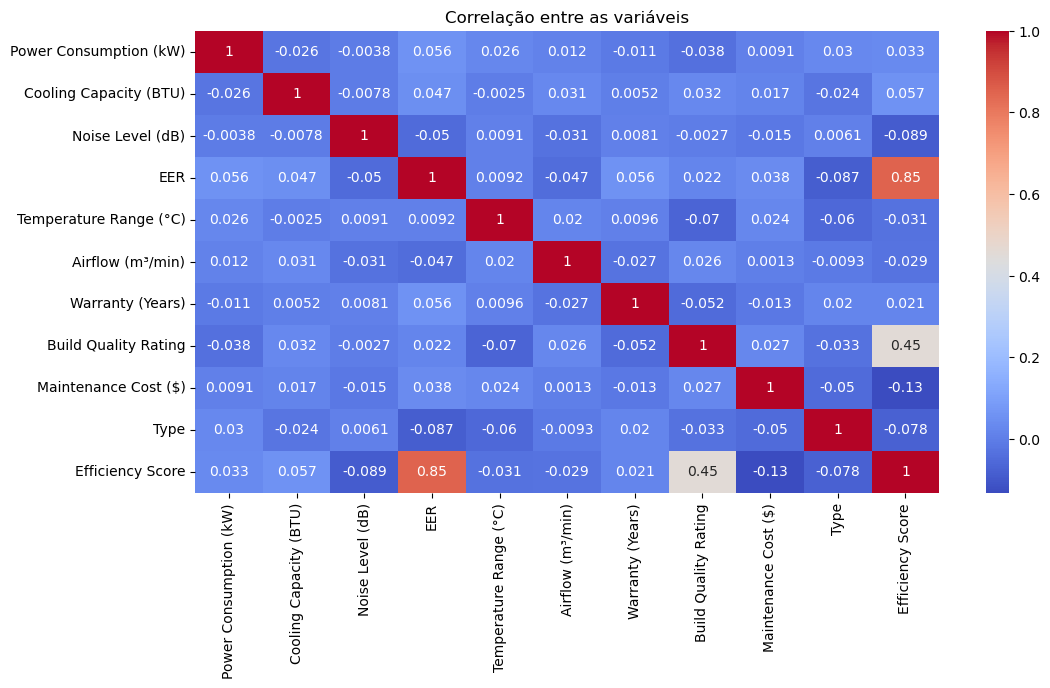

In [526]:
# Correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlação entre as variáveis')
plt.show

In [527]:
# Splitting the data
X = data.drop('Efficiency Score', axis=1)
X

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0
...,...,...,...,...,...,...,...,...,...,...
995,1.46,12000,47.03,3.90,30,10.13,2,10,265,1
996,5.59,24000,57.44,3.32,15,9.41,6,9,290,1
997,1.68,30000,51.86,3.62,18,21.04,6,3,274,0
998,5.75,24000,38.42,4.39,25,26.15,6,2,100,0


In [528]:
# Target variable
y = data['Efficiency Score']
y

0       96
1       77
2       83
3       75
4       84
      ... 
995    100
996     82
997     79
998     94
999     62
Name: Efficiency Score, Length: 1000, dtype: int64

In [529]:
# # Train and test split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [530]:
from sklearn.model_selection import train_test_split

# Primeiro, separe 20% dos dados para o conjunto de teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Em seguida, separe 25% dos dados restantes para o conjunto de validação
# Isso resulta em 20% do total original (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [531]:
# Imprimir as formas dos conjuntos de dados
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (600, 10)
X_val shape: (200, 10)
X_test shape: (200, 10)
y_train shape: (600,)
y_val shape: (200,)
y_test shape: (200,)


In [532]:
# Transforming y values into binary values from the median
import numpy as np

threshold = y.median()
y_train_bin = np.where(y_train > threshold, 1, 0)
y_val_bin = np.where(y_val > threshold, 1, 0)
y_test_bin = np.where(y_test > threshold, 1, 0)

In [533]:
# Logistic Regression model training
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train_bin)

LogisticRegression(max_iter=10000)

In [534]:
# Predictions
y_pred = log_model.predict(X_test)
y_pred_val = log_model.predict(X_val)
y_pred_train = log_model.predict(X_train)

In [535]:
# Accuracy test
from sklearn.metrics import accuracy_score

y_train_bin = np.where(y_train > threshold, 1, 0)
accuracy_train = accuracy_score(y_train_bin, y_pred_train)
print('Acurácia (Regressão Logística) - Treino:', accuracy_train)

y_val_bin = np.where(y_val > threshold, 1, 0)
accuracy_val = accuracy_score(y_val_bin, y_pred_val)
print('Acurácia (Regressão Logística) - Validação:', accuracy_val)

y_test_bin = np.where(y_test > threshold, 1, 0)
accuracy = accuracy_score(y_test_bin, y_pred)
print('Acurácia (Regressão Logística)- Teste', accuracy)

Acurácia (Regressão Logística) - Treino: 0.945
Acurácia (Regressão Logística) - Validação: 0.97
Acurácia (Regressão Logística)- Teste 0.94


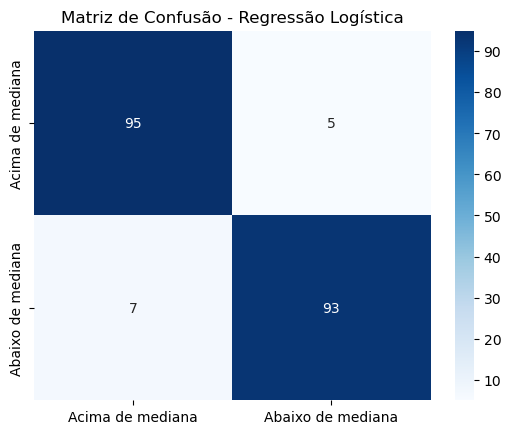

In [536]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_bin, y_pred)
class_labels = ['Acima de mediana', 'Abaixo de mediana']
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()